# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

# Librerias


In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)  
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import seaborn as sns
import pylab as plt
import matplotlib.pyplot as plt

# modelos

from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import LogisticRegression as LogR



## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
student_data = pd.DataFrame({'X': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Y': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

Draw a dispersion diagram (scatter plot) for the data.

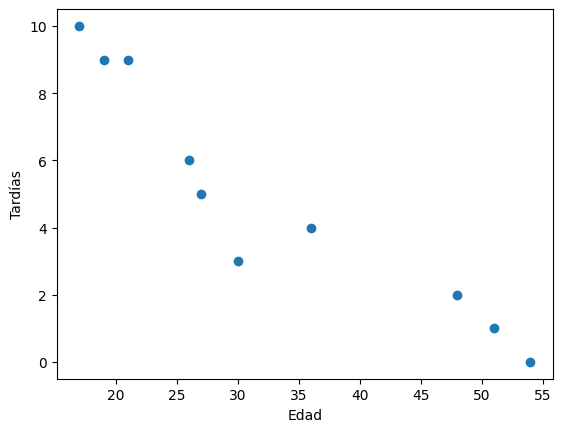

In [3]:

plt.xlabel('Edad')
plt.ylabel('Tardías')

plt.scatter(student_data.X, student_data.Y)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

Se ve claramente que a medida que aumenta la edad disminuye el número de tardías, la profesora tiene razón

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

Covarianza: relación lineal entre los datos
- '+' relación directa
- '-' relación inversa

Correlación [-1,1]
- 1 correlación positiva perfecta

In [4]:
# Your response here.

print('covarianza: ', student_data['X'].cov(student_data['Y']))

# Calcular la correlación
print('correlación: ', student_data['X'].corr(student_data['Y']))

covarianza:  -45.56666666666666
correlación:  -0.9391626886887122


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

Aquí tiene sentido utilizar regresión lineal

In [5]:
X = student_data.X
Y = student_data.Y

In [6]:
X = X.values.reshape(-1, 1)

In [7]:
# Your response here.
linreg=LinReg()

linreg.fit(X, Y)

# coeficientes de la linea de regresión
m = linreg.coef_[0] #para que me de un valor y no un array
ord = linreg.intercept_ #ordenada en el origen

Plot your regression model on your scatter plot.

Text(0, 0.5, 'Y')

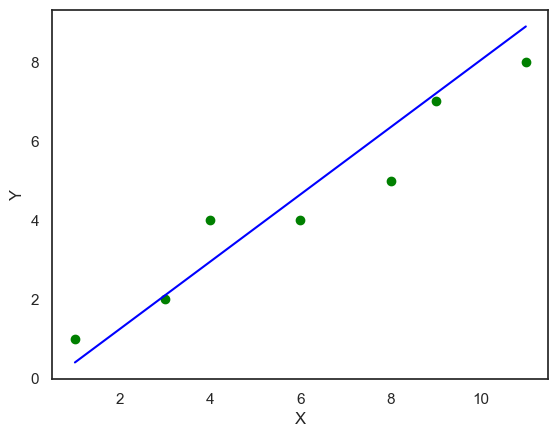

In [36]:
# Your code here.

# Crear valores x en el rango de los datos de entrada X
x = np.linspace(X.min(), X.max())

# Calcular los valores correspondientes de y utilizando la ecuación de la regresión lineal

# y = mx + b

y = m * x + ord

# datos
plt.scatter(X, Y, color='green', label='Data')

# recta de ajuste
plt.plot(x, y, color='blue', label='Regression Line')

# Configurar el título y las etiquetas de los ejes
plt.xlabel('X')
plt.ylabel('Y')

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [9]:
# Your response here. 

#Los datos se acercan bastante a la linea de regresión

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [10]:
# Import any libraries you may need & the data

v = pd.read_csv('vehicles.csv')

In [11]:
v.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [12]:
v.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

In [13]:
va = v[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile' ]]

va.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500


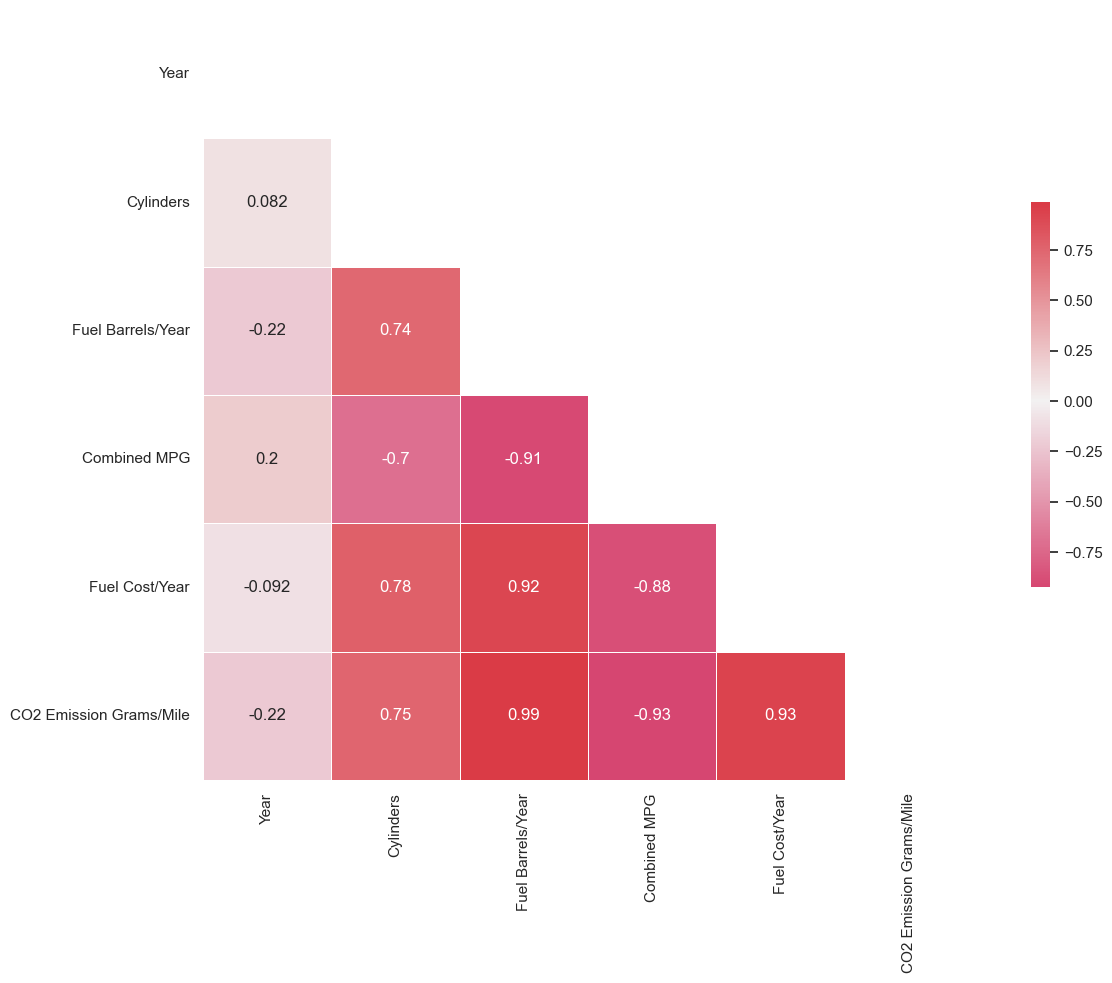

In [14]:


plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(va.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(va.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [15]:
# Your response here. 

va.corr()['CO2 Emission Grams/Mile']

Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
Fuel Cost/Year             0.930865
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64

La que más influencia tiene parece ser Fuel Barrels/Year y Fuel Cost/Year

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

Regresión Lineal:

In [16]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [17]:
va.columns

Index(['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG',
       'Fuel Cost/Year', 'CO2 Emission Grams/Mile'],
      dtype='object')

In [18]:
# Your response here. 

#se crea un dataframe con las columnas de variables independientes y se le añade una constante que es el punto de corte con el eje de ordenadas 

x=sm.add_constant(va[[
    
    'Year',
    'Cylinders',
    'Fuel Barrels/Year',
    'Combined MPG',
    'Fuel Cost/Year',
    
]]#.apply(lambda x: x.fillna(x.mean()))

)

y=va['CO2 Emission Grams/Mile']


modelo=sm.OLS(y, x).fit()  #ajuste del modelo a los datos

pred=modelo.predict(x)   #predicciones 



Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [19]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Thu, 25 May 2023   Prob (F-statistic):               0.00
Time:                             07:18:56   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

La segunda nota del modelo me está advirtiendo de que hay colinealidad entre las varibales y eso puede afectar la interpretación del modelo

- R2: casi el total de los datos se explican con el resto de las variables
- utiliza el método de los minimos cuadrados

los p valores son nulos, esto quiere decir que están altamente relacionadas 

- Year es negativo por lo tanto por cada aumento de año disminuyen un poquito las emisiones
- Fuel Barrels/Year esta es la que más influye en el modelo, lo cual tiene entido ya que si aumentan las emisiones aumenta el consumo


## Con un arbol de decisión


In [20]:
from sklearn.tree import DecisionTreeRegressor as DTR

In [21]:
va

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500
...,...,...,...,...,...,...
35947,2013,3.0,9.155833,36,1100,244.000000
35948,2014,3.0,9.155833,36,1100,243.000000
35949,2015,3.0,9.155833,36,1100,244.000000
35950,2016,3.0,9.155833,36,1100,246.000000


In [22]:
X = va.drop(columns=['CO2 Emission Grams/Mile'])

In [23]:
y = va['CO2 Emission Grams/Mile']

In [24]:
dtr = DTR().fit(X, y)

In [25]:
dict(zip(X.columns, dtr.feature_importances_*100))

{'Year': 0.008118554287311792,
 'Cylinders': 0.0046777842397490044,
 'Fuel Barrels/Year': 83.32106681652895,
 'Combined MPG': 16.63782426646525,
 'Fuel Cost/Year': 0.0283125784787394}

In [26]:
# Your response here. 



## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [27]:
# Your code here. 

party = pd.DataFrame({'X': [1, 3, 4, 6, 8, 9, 11, 14], 'Y': [1, 2, 4, 4, 5, 7, 8, 13]})

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

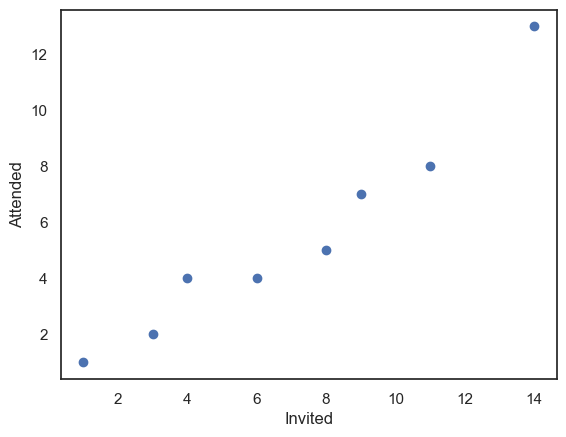

In [28]:
# Your code here.

plt.xlabel('Invited')
plt.ylabel('Attended')

plt.scatter(party.X, party.Y)

In [29]:
X = party.X
Y = party.Y

X=X.values.reshape(-1,1)

linreg.fit(X,Y)

m = linreg.coef_[0]
ord = linreg.intercept_

Text(0, 0.5, 'Y')

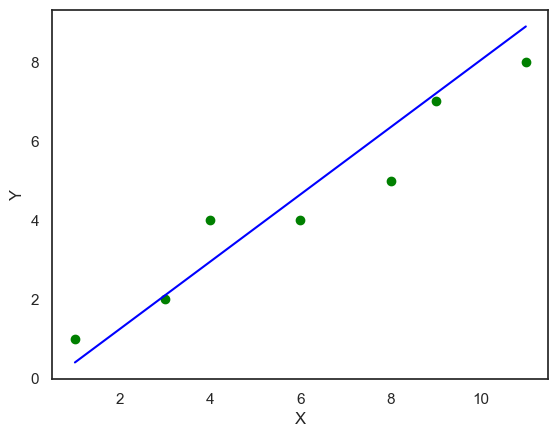

In [37]:
# Crear valores x en el rango de los datos de entrada X
x = np.linspace(X.min(), X.max())

# Calcular los valores correspondientes de y utilizando la ecuación de la regresión lineal

# y = mx + b

y = m * x + ord

# datos
plt.scatter(X, Y, color='green', label='Data')

# recta de ajuste
plt.plot(x, y, color='blue', label='Regression Line')

# Configurar el título y las etiquetas de los ejes

plt.xlabel('X')
plt.ylabel('Y')

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [31]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [32]:
# Your response here. 

#hay un punto más alejado pero sigue la recta maaaas o menos 

{'whiskers': [<matplotlib.lines.Line2D at 0x2a42b6d66b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a42b6d6aa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a42b6d6410>],
 'medians': [<matplotlib.lines.Line2D at 0x2a42b6d6fe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a42b6d7280>],
 'means': []}

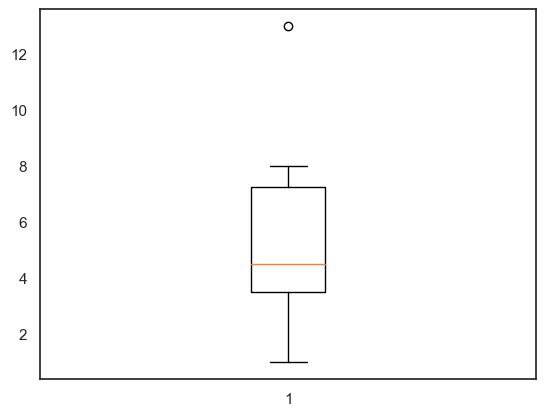

In [33]:
plt.boxplot(party['Y'])

Text(0, 0.5, 'Y')

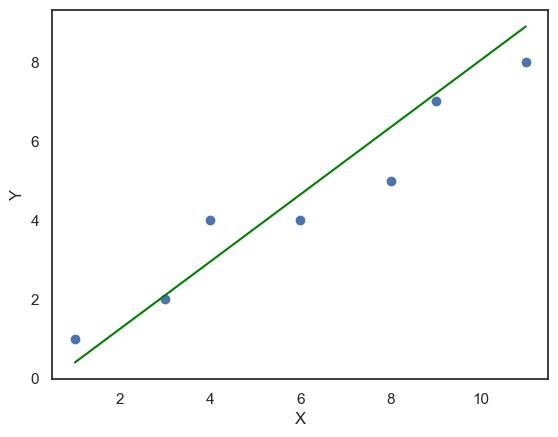

In [43]:
Q1 = party['Y'].quantile(0.25)
Q3 = party['Y'].quantile(0.75)


IQR = Q3 - Q1   # rango intercuartil


umbral = 1.5 * IQR    # esto es un estandar para ver outliers


party_c = party.drop(party.index[-1])  # elimino el oulier

# Volver a ajustar el modelo de regresión lineal con los datos sin outliers
X = party_c['X']
Y = party_c['Y']


m = linreg.coef_[0]
ord = linreg.intercept_

y = m*X + ord


plt.scatter(X, Y)
plt.plot(X, y, color='green')
plt.xlabel('X')
plt.ylabel('Y')


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [44]:
# Your response here. 